In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [4]:
print(data_info.loc['revol_util']['Description'])
# Just checking a LoanStat

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

    #This is a function to allow the user to find the description of any 'LoanStat' column they want.

In [6]:
feat_info('pub_rec')

Number of derogatory public records


In [7]:
feat_info('application_type')

Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# Now let's create a new dataframe for actual values of all these LoanStats.

df = pd.read_csv('lending_club_loan_two.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [11]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [12]:
feat_info('loan_status')

Current status of the loan


<Axes: xlabel='loan_status', ylabel='count'>

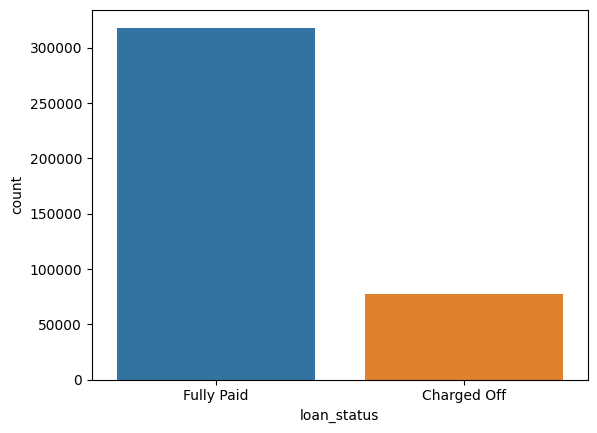

In [13]:
sns.countplot(data=df,x='loan_status')

#Countplot of Loan Status
#We can see that majority of the people have fully paid off the loan.

(array([4.2620e+03, 8.4330e+03, 1.2527e+04, 2.6213e+04, 2.1650e+04,
        1.8945e+04, 2.2140e+04, 1.6424e+04, 3.9178e+04, 1.2073e+04,
        2.8333e+04, 1.4873e+04, 2.6893e+04, 1.4963e+04, 7.4560e+03,
        1.4566e+04, 6.1640e+03, 2.2873e+04, 8.2210e+03, 6.0600e+03,
        1.1086e+04, 1.1654e+04, 2.5050e+03, 2.4980e+03, 6.6640e+03,
        1.7120e+03, 7.8580e+03, 2.2150e+03, 1.2940e+03, 1.0900e+03,
        1.4950e+04, 5.2000e+01, 9.0000e+00, 1.1000e+01, 1.8500e+02]),
 array([  500.        ,  1628.57142857,  2757.14285714,  3885.71428571,
         5014.28571429,  6142.85714286,  7271.42857143,  8400.        ,
         9528.57142857, 10657.14285714, 11785.71428571, 12914.28571429,
        14042.85714286, 15171.42857143, 16300.        , 17428.57142857,
        18557.14285714, 19685.71428571, 20814.28571429, 21942.85714286,
        23071.42857143, 24200.        , 25328.57142857, 26457.14285714,
        27585.71428571, 28714.28571429, 29842.85714286, 30971.42857143,
        32100.    

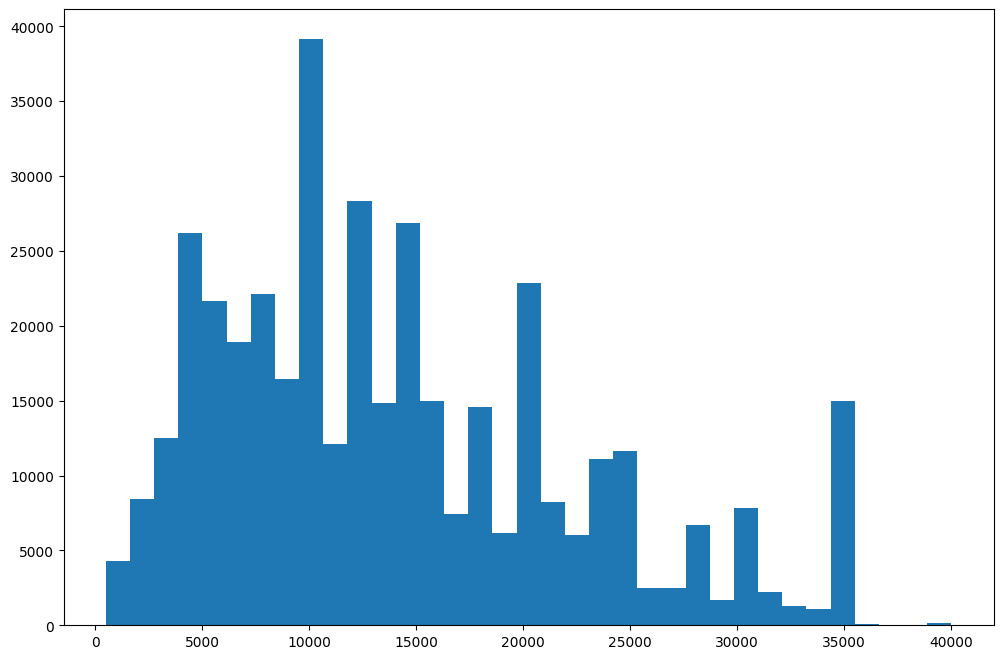

In [14]:
plt.figure(figsize=(12,8))
plt.hist(data=df,x='loan_amnt',bins=35)

In [15]:
# From the above histogram, we can see that most of the loan amounts are in the range(10000 to 20000). and sudden spike at 35000

In [16]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<ipython-input-17-f198ff4ef361>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),cmap='coolwarm',annot=True)


<Axes: >

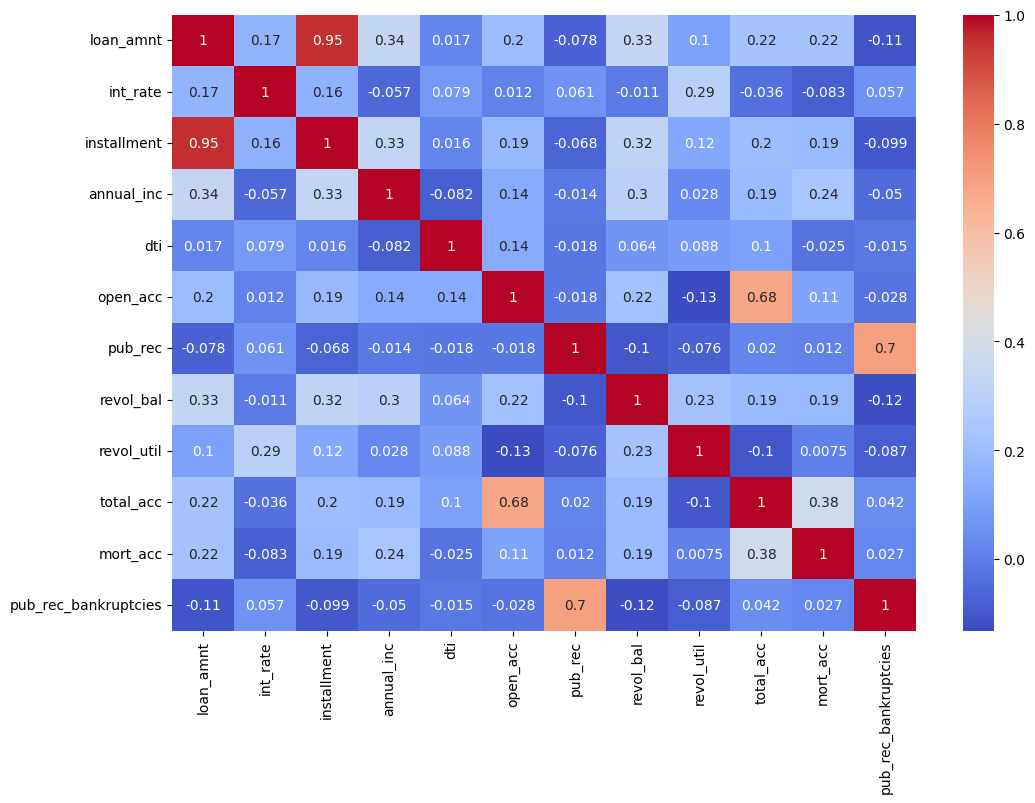

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(),cmap='coolwarm',annot=True)

In [18]:
# So, from the above heatmap, we can see the closest feature that affects loan_amnt is the 'installment' feature.

#Also, annot=True is used here since we want to see numeric value in each box.

In [19]:
feat_info('installment') # checking the most-corelated feature.

The monthly payment owed by the borrower if the loan originates.


In [20]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [21]:
# This corr() between loan_amnt and installment makes sense because as loan amnt increases installment also increases.

<Axes: xlabel='installment', ylabel='loan_amnt'>

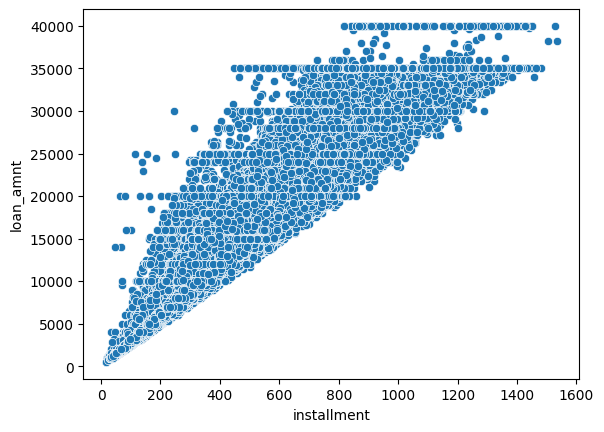

In [22]:
sns.scatterplot(data=df,x='installment',y='loan_amnt')

In [23]:
# We see an almost linear relation between the two features.

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

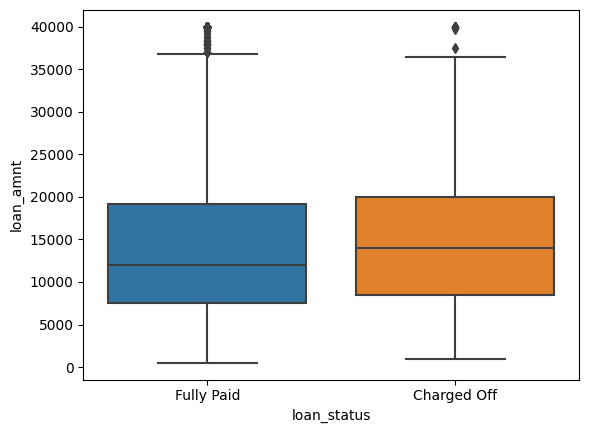

In [24]:
sns.boxplot(data=df,x='loan_status',y='loan_amnt')

In [25]:
# Here, we can see that the loan_amnt of those who have not paid back is slightly more than that of those who paid back the loan.

In [26]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [27]:
feat_info('grade')

LC assigned loan grade


In [28]:
feat_info('sub_grade')

LC assigned loan subgrade


In [29]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [30]:
df['sub_grade'].sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

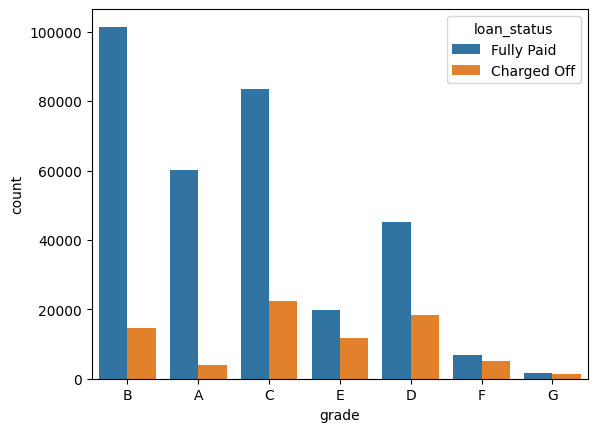

In [31]:
sns.countplot(data=df,x='grade',hue='loan_status')

In [32]:
# Grade A seems to have the highest ratio of fully paid to not-paid.

<Axes: xlabel='sub_grade', ylabel='count'>

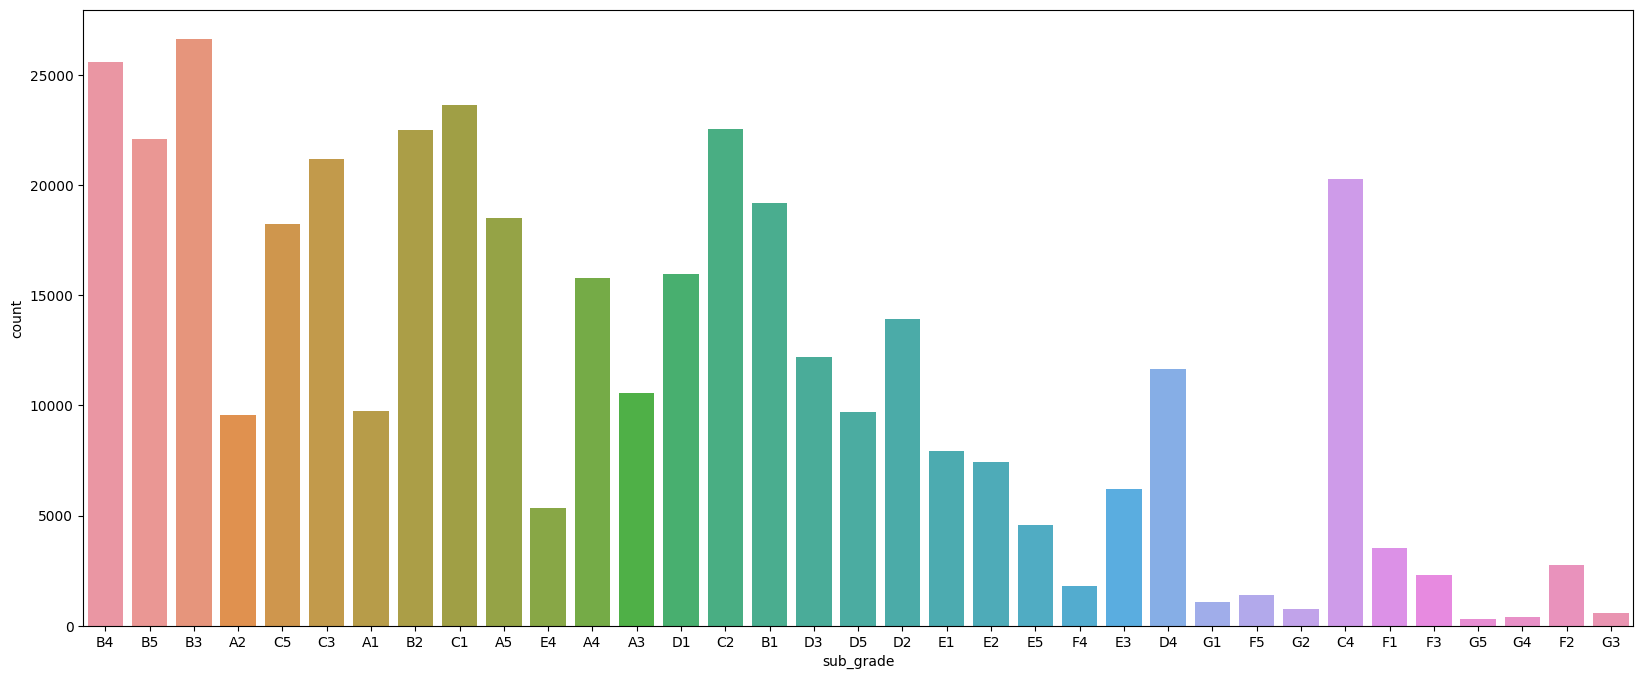

In [33]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='sub_grade')

In [34]:
unique_sub_grades=df['sub_grade'].sort_values().unique().tolist()

In [35]:
unique_sub_grades

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='sub_grade', ylabel='count'>

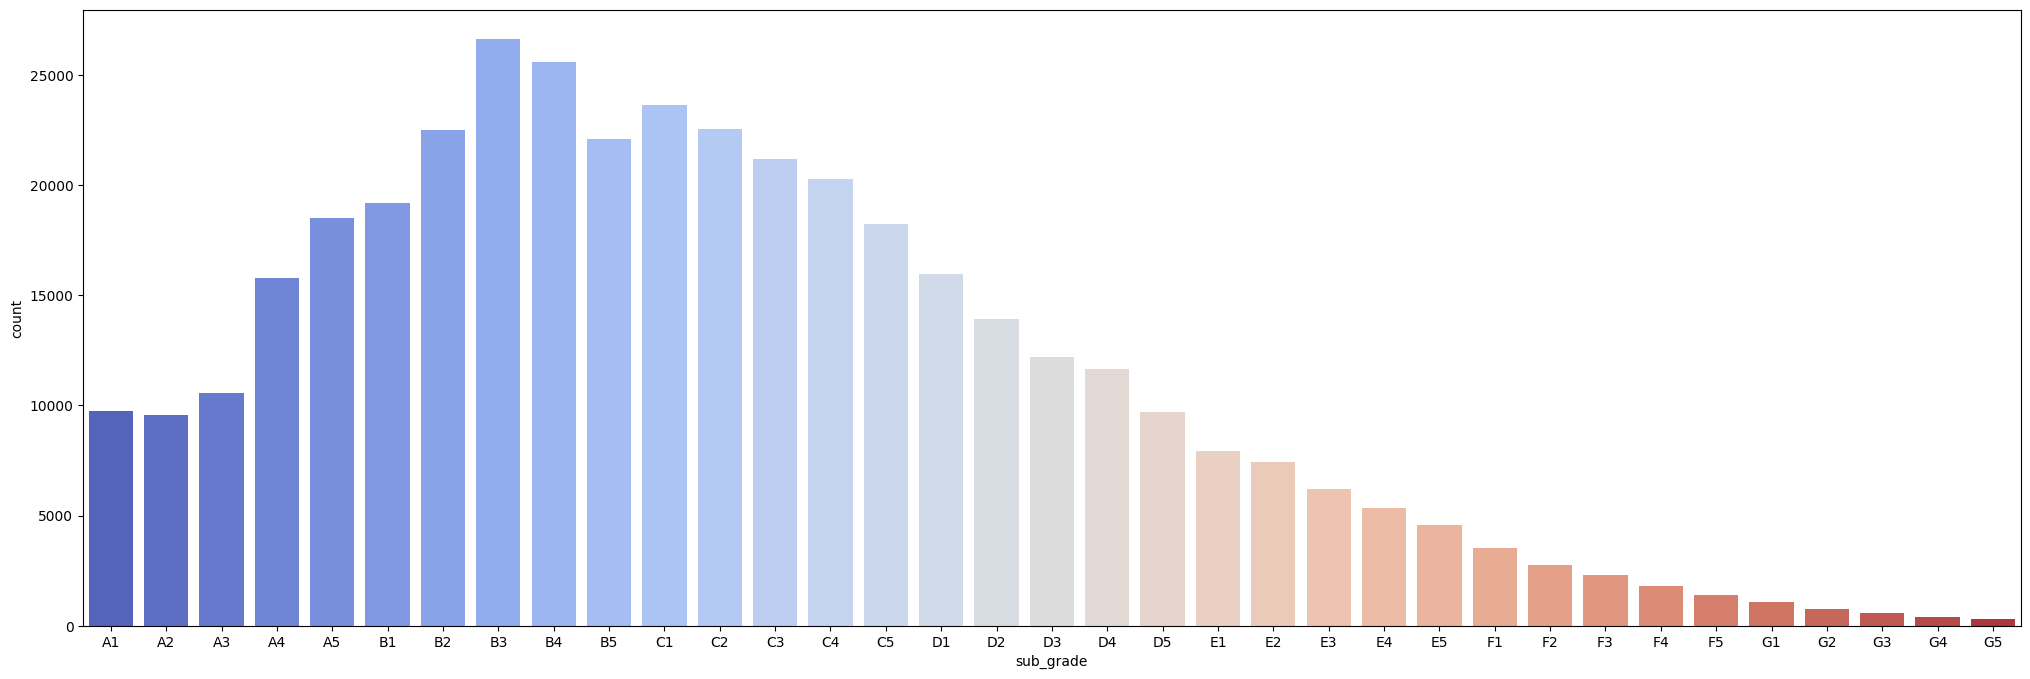

In [36]:
plt.figure(figsize=(25,8))
sns.countplot(data=df,x='sub_grade',order=unique_sub_grades,palette='coolwarm')

In [37]:
# Most of the borrowers belong to B sub grades.

<Axes: xlabel='sub_grade', ylabel='count'>

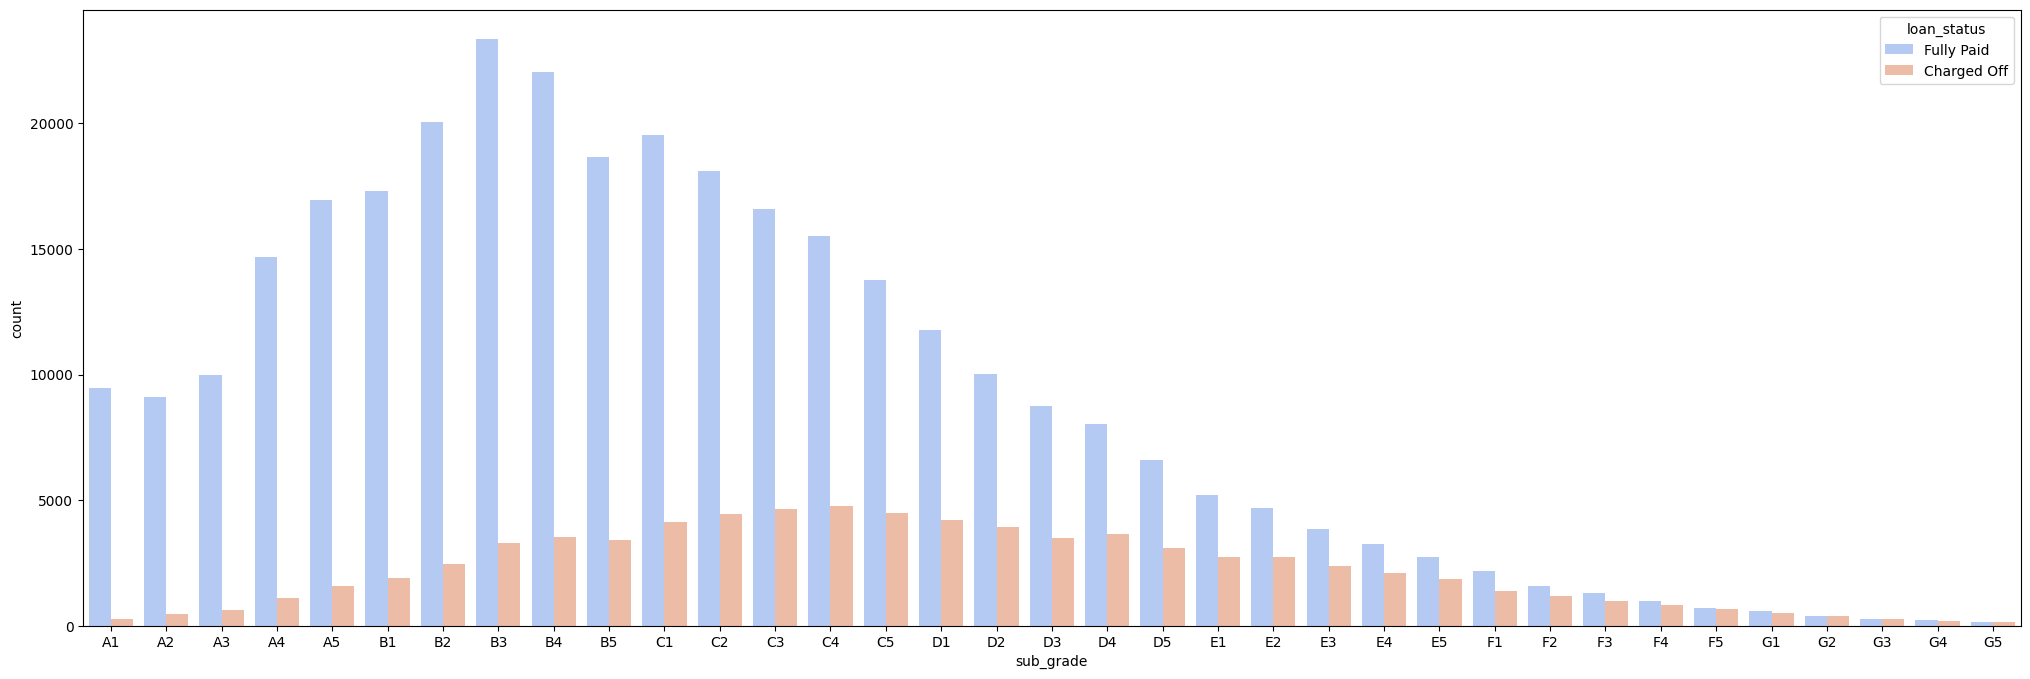

In [38]:
plt.figure(figsize=(25,8))
sns.countplot(data=df,x='sub_grade',order=unique_sub_grades,palette='coolwarm',hue='loan_status')

In [39]:
# Very less people from A1 and A2 grades have charged off the loan, meaning A1 and A2 represent the best grades of a person.

In [40]:
F_G_sub_grades = unique_sub_grades[25:]

<Axes: xlabel='sub_grade', ylabel='count'>

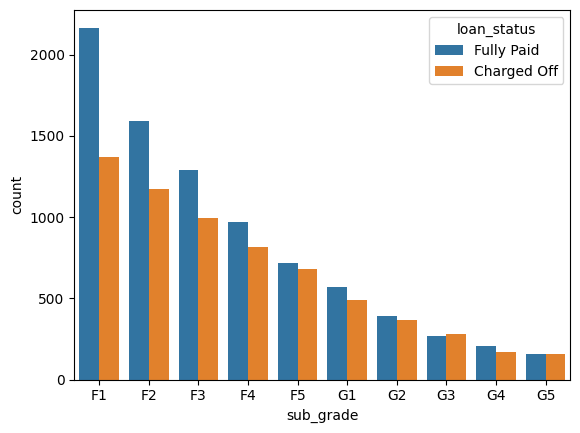

In [41]:
sns.countplot(data=df,x='sub_grade',order=F_G_sub_grades,hue='loan_status')

In [42]:
def repaid(x):
    if x=='Fully Paid':
        return 1
    elif x=='Charged Off':
        return 0


df['loan_repaid'] = df['loan_status'].apply(lambda x: repaid(x))

In [43]:
df[['loan_repaid','loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


In [44]:
df.corr().drop(columns='loan_repaid',axis=1,inplace=False)

<ipython-input-44-15fe44d1f819>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().drop(columns='loan_repaid',axis=1,inplace=False)


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<ipython-input-45-9aa78d96c85a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')


<Axes: >

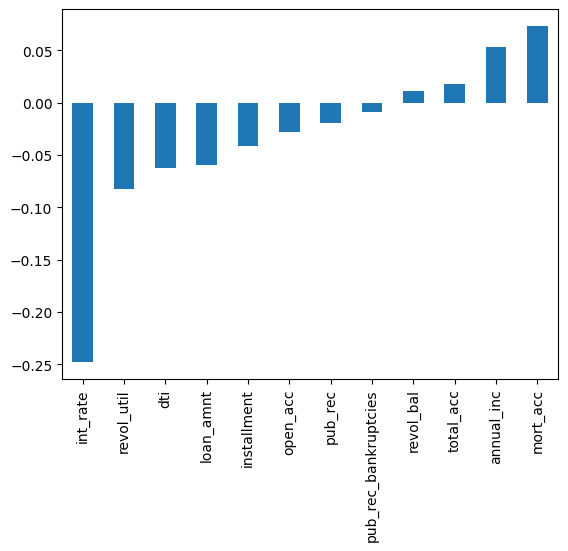

In [45]:
df.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')

In [46]:
feat_info('mort_acc')

Number of mortgage accounts.


In [47]:
#Section 2

In [48]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [49]:
df.shape[0]
len(df)

396030

In [50]:
missing_values = pd.Series(df.isnull().sum())

In [51]:
missing_values

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [52]:
missing_values = (missing_values/df.shape[0])*100
missing_values

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [53]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [54]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [55]:
df['emp_title'].nunique()

173105

In [56]:
unique_employee_count = pd.Series(df['emp_title'].value_counts())

In [57]:
unique_employee_count

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [58]:
# But there are too many unique job titles to convert them into num using dummy variable.
# So let's remove that emp_title column

df.drop(columns='emp_title',axis=1,inplace=True)

In [59]:
sorted_emp_length = sorted(df['emp_length'].dropna().unique())

In [60]:
sorted_emp_length

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [61]:
sorted_emp_length= [ '< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

<Axes: xlabel='emp_length', ylabel='count'>

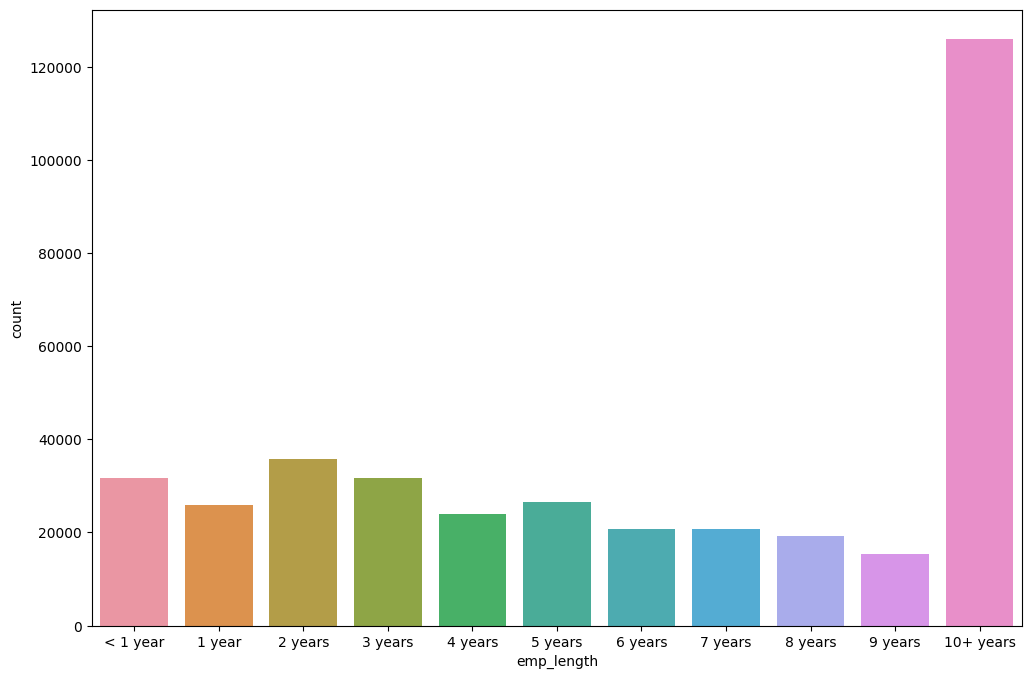

In [62]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='emp_length',order=sorted_emp_length)

In [63]:
# Most of the borrowers had a employement length of 10+ years

<Axes: xlabel='emp_length', ylabel='count'>

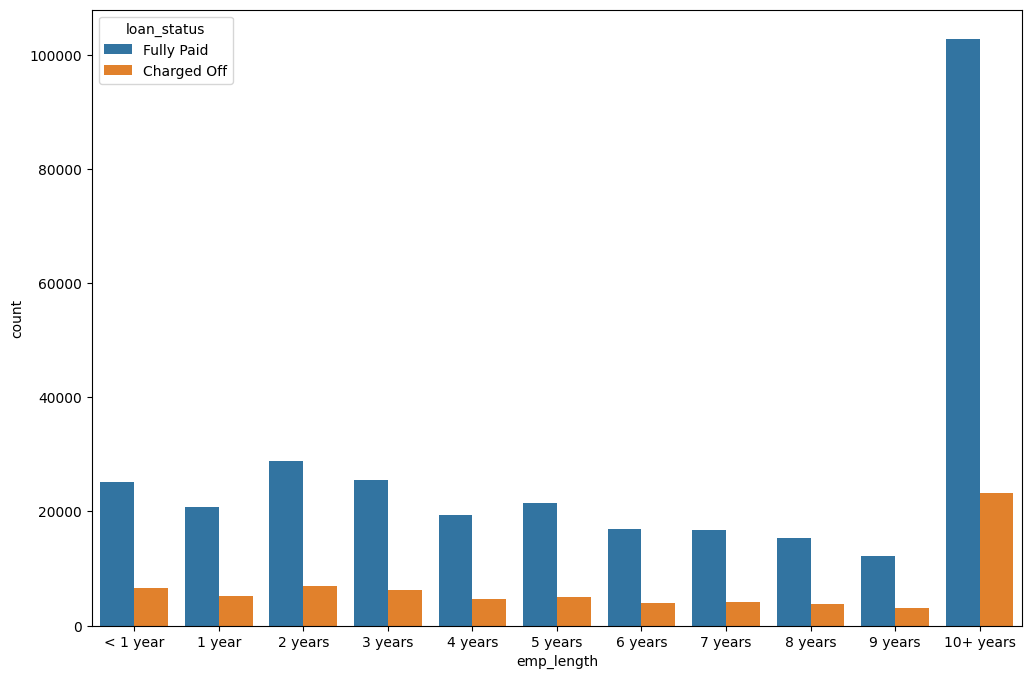

In [64]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='emp_length',order=sorted_emp_length,hue='loan_status')

In [65]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
# emp_co for emp_charged_off

In [66]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
# emp_fp for emp_fully_paid

In [67]:
emp_len = emp_co/(emp_co+emp_fp)
#Ratio of co and fp in every emp_length
#Highest co ratio seems to be <1 year and least is 10+ year which makes sense

<Axes: xlabel='emp_length'>

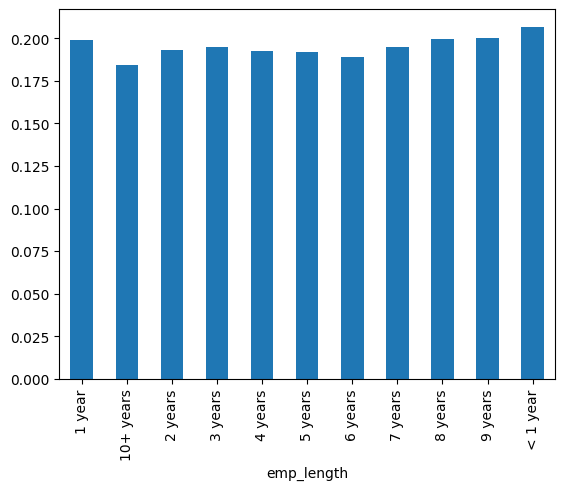

In [68]:
emp_len.plot(kind='bar')

In [69]:
# There isn't much difference between the emp_lenghts(very less).
# So, this feature may not be important in validating our data.
# So, let's drop emp_length.

df.drop('emp_length',axis=1,inplace=True)

In [70]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [71]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [72]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [73]:
# the title column seems to be just a string subcategory of the purpose column.
# So let's drop the title column

df.drop('title',axis=1,inplace=True)

In [74]:
# Now coming to mort_acc column
feat_info('mort_acc')

Number of mortgage accounts.


In [75]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [76]:
df.corr()['mort_acc'].sort_values()

<ipython-input-76-08a22ffe92b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values()


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [77]:
# Looks like total_acc has closest relation to mort_acc

feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [78]:
 total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

<ipython-input-78-d5f3724f8e1b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg = df.groupby('total_acc').mean()['mort_acc']


In [79]:
# It means that if you have total accounts=2, then you will have 0 mortgage accounts and so on..

In [80]:
def fill_mort_acc(total_acc,mort_acc):

    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [81]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [82]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [83]:
# Let's also remove the missing value rows in revol_util and pub_rec_bankruptcies since they account for less than 0.5% of our data

In [84]:
df = df.dropna()

In [85]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [86]:
# Now, all the missing values are gone!
# Now we need to convert all categorical values into numerical.

In [87]:
# Selecting all columns that are non-numeric

df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [88]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [89]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [90]:
# We wish to convert 36 months into 36 and 60 months into 60

df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [91]:
# We already know grade is not imp becoz we have sub_grade, so drop the grade column

In [92]:
df.drop('grade',axis=1,inplace=True)

In [93]:
df.select_dtypes(['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [94]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [95]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [96]:
# We can see one hot encoding is done to all the sub_grades

In [97]:
#We'll perform the same one-hot encoding for verification_status, application_type,initial_list_status,purpose

In [98]:
dummies = pd.get_dummies(df['verification_status'],drop_first=True)

df = pd.concat([df.drop('verification_status',axis=1),dummies],axis=1)

In [99]:
dummies = pd.get_dummies(df['application_type'],drop_first=True)

df = pd.concat([df.drop('application_type',axis=1),dummies],axis=1)

In [100]:
dummies = pd.get_dummies(df['initial_list_status'],drop_first=True)

df = pd.concat([df.drop('initial_list_status',axis=1),dummies],axis=1)

In [101]:
dummies = pd.get_dummies(df['purpose'],drop_first=True)

df = pd.concat([df.drop('purpose',axis=1),dummies],axis=1)

In [102]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [103]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [104]:
df.loc[(df['home_ownership']=='NONE') | (df['home_ownership']=='ANY'),'home_ownership'] = 'OTHER'

In [105]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [106]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [107]:
# Creating a new column called zip_code which has zip_code from the address column.

df['zip_code'] = df['address'].apply(lambda address: address[-1:-6:-1][::-1])

In [108]:
df['zip_code'].head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: zip_code, dtype: object

In [109]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)

df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [110]:
df.drop('address',axis=1,inplace=True)

In [111]:
df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

In [112]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [113]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [114]:
df.drop('issue_d',axis=1,inplace=True)

In [115]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

In [116]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [117]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [118]:
# Let's extract only the year from earliest_cr_line

df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x.split('-')[1]))

In [119]:
df['earliest_cr_year'].head()

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_year, dtype: int64

In [120]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [121]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [122]:
df['loan_status'].head()

0     Fully Paid
1     Fully Paid
2     Fully Paid
3     Fully Paid
4    Charged Off
Name: loan_status, dtype: object

In [123]:
df['loan_repaid'].head()

0    1
1    1
2    1
3    1
4    0
Name: loan_repaid, dtype: int64

In [124]:
df.drop('loan_status',axis=1,inplace=True)

In [125]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', '05113', '11650', '22690', '29597', '30723', '48052',
       '70466', '86630', '93700', 'OTHER', 'OWN', 'RENT', 'earliest_cr_year'],
      dtype='object')

In [126]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [127]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
scaler = MinMaxScaler()

In [130]:
X_train = scaler.fit_transform(X_train)

In [131]:
X_test = scaler.transform(X_test)

In [132]:
import tensorflow as tf

In [133]:
import numpy as np

print(np.__version__)

1.23.5


In [134]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [135]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [136]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 7s 4ms/step - loss: 0.2967 - val_loss: 0.2649
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2655 - val_loss: 0.2628
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2629 - val_loss: 0.2624
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2615 - val_loss: 0.2620
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2609 - val_loss: 0.2618
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2604 - val_loss: 0.2616
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2600 - val_loss: 0.2617
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2598 - val_loss: 0.2614
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2593 - val_loss: 0.2615
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.259

In [137]:
X_train.shape

(316175, 78)

In [138]:
from tensorflow.keras.models import load_model

In [139]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [140]:
loss = pd.DataFrame(model.history.history)

<Axes: >

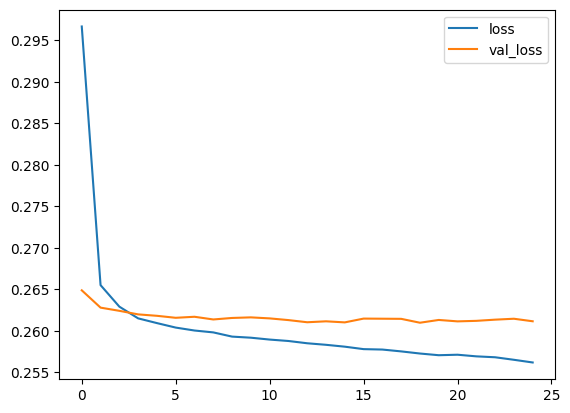

In [141]:
loss.plot()

In [142]:
# It's overfitting here as we can see the val_loss is increasing after a certain epoch, which should not be happening!

In [143]:
import numpy as np

predictions = model.predict(X_test)

binary_predictions = np.where(predictions >= 0.5, 1, 0)



2471/2471 [==============================] - 4s 1ms/step


In [144]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,binary_predictions))
print('\n')
print(classification_report(y_test,binary_predictions))

[[ 6804  8854]
 [   68 63318]]


              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [145]:
binary_predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [146]:
y_test

array([1, 1, 1, ..., 0, 1, 0])

In [147]:
# Here we are getting 89% accuracy....But wait, our classes are imbalanced. 80% of the dataset points to 'Fully paid' or 1 label.

# So, we should be seeing really at is: 'f1-score' which is a harmonic mean of precision and recall.

In [148]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
93700                   0.00
OTHER                   0.00
OWN                     0.00
RENT                    1.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [150]:
new_customer.shape

(78,)

In [153]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [154]:
model.predict(new_customer)
binary_pred = np.where(model.predict(new_customer)>=0.5,1,0)

1/1 [==============================] - 0s 18ms/step


In [155]:
binary_pred

array([[1]])

In [158]:
# Now to check whether this person actually paid the loan or not?

df.iloc[random_ind]['loan_repaid']

1.0